#### Conjecture

* Pick a number.
* If it is odd, multiply it by 3 and add 1
* If it is even, divide by 2.
* Repeat.
* All numbers eventually get stuck into a 4 - 2 - 1 loop.

#### Caution

* Nobody in their right mind would try to prove / disprove the conjecture. 
* I am just trying to understand the highest number reached in the series of a number.

#### Code

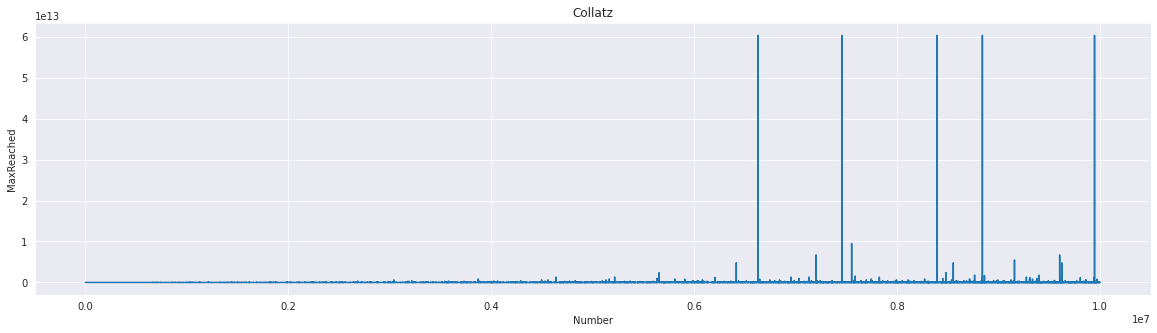

In [2]:
start, end = 1, 10_000_000

import pandas as pd, matplotlib.pyplot as plt, seaborn as sns
sns.set_style('darkgrid')

number_max = dict()
for num in range(start, end + 1):
    act_num = num
    max_ = 0
    while True:
        if num % 2:
            num = int((num * 3) + 1)
        else:
            num = int(num // 2)

        max_ = max(num, max_)

        if num == 4:
            number_max[act_num] = max_
            break
        
df = pd.DataFrame({'Number': list(range(start, end + 1))})
df.loc[:, 'MaxReached'] = df.Number.map(number_max)
df.to_excel('/content/drive/MyDrive/Collatz.xlsx', index = False)

plt.figure(figsize = (20, 5))
plt.title('Collatz')
sns.lineplot(x = 'Number', y = 'MaxReached', data = df)

In [3]:
def collatz(n):
    reached_4 = False
    while True:
        print(n, end = ', ')
        if n == 1 and reached_4:
            break
        if n == 4:
            reached_4 = True
        if n % 2:
            n = (n * 3) + 1
        else:
            n = n // 2

collatz(7)

7, 22, 11, 34, 17, 52, 26, 13, 40, 20, 10, 5, 16, 8, 4, 2, 1, 

In [5]:
summary = df.MaxReached.value_counts()
summary.to_excel('/content/drive/MyDrive/Collatz_Summary.xlsx')